In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from decimal import Decimal 

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv("../data/SIB_impulsivity_scores_corrected_age.csv")

In [4]:
data

,Filename,Cohort,I plan tasks carefully,I do things without thinking,I make up my mind quickly,I am happy-go-lucky,I don't pay attention,I have racing thoughts,I plan trips well ahead of time,I am self-controlled,I concentrate easily,I save regularly,I squirm at plays or lectures,I am a careful thinker,I plan for job security,I say things without thinking,I like to think about complex problems,I change jobs,I act on impulse,I get easily bored when solving thought problems,I act on the spur of the moment,I am a steady thinker,I change residences,I buy things on impulse,I can only think about one thing at a time,I change hobbies,I spend or charge more than I earn,I often have extraneous thoughts when thinking,I am interested in the present rather than the future,I am restless at the theater or lectures,I like puzzles,I am future-oriented,Sex,Age
0,ms_00_0002,0.0,0.484142,0.537676,0.510807,0.509639,0.461079,0.494558,0.540803,0.504568,0.442008,0.483280,0.551027,0.526782,0.542553,0.502925,0.563551,0.508004,0.513819,0.535087,0.470651,0.533217,0.475418,0.516692,0.544649,0.547698,0.544089,0.539581,0.547779,0.562329,0.481741,0.515686,Male,35
1,ms_00_0003,0.0,0.462905,0.539485,0.506932,0.515009,0.464140,0.484329,0.539004,0.489307,0.414379,0.459030,0.553281,0.514914,0.535675,0.509095,0.566136,0.493146,0.498153,0.531901,0.476657,0.518284,0.457462,0.511288,0.561959,0.534035,0.535207,0.538311,0.550503,0.554669,0.466526,0.496958,Male,28
2,ms_00_0005,0.0,0.497676,0.563535,0.528680,0.531690,0.493923,0.509793,0.552927,0.526594,0.462331,0.497874,0.571776,0.541729,0.556595,0.531797,0.575607,0.528357,0.531864,0.538310,0.486233,0.547050,0.501992,0.531929,0.561972,0.565119,0.547909,0.542106,0.552121,0.573895,0.510506,0.529006,Female,26
3,ms_00_0006,0.0,0.474751,0.535256,0.517590,0.525476,0.473441,0.501951,0.533853,0.502028,0.448454,0.484475,0.545031,0.514645,0.539983,0.512375,0.555451,0.510396,0.512198,0.516365,0.470076,0.520269,0.481481,0.510203,0.542194,0.545317,0.521346,0.519191,0.538390,0.550724,0.497979,0.514511,Female,27
4,ms_00_0007,0.0,0.480642,0.541749,0.519318,0.519707,0.471064,0.489588,0.546533,0.505810,0.439400,0.479841,0.547428,0.529424,0.535591,0.509628,0.560996,0.509277,0.513147,0.527831,0.482019,0.533216,0.477127,0.506413,0.564710,0.543866,0.535902,0.534248,0.553446,0.552427,0.482759,0.518997,Male,27
5,ms_00_0008,0.0,0.487535,0.544484,0.526220,0.521412,0.466931,0.501157,0.550069,0.507461,0.442960,0.483102,0.557495,0.541683,0.559774,0.507912,0.574325,0.506866,0.511912,0.546389,0.479521,0.549557,0.476928,0.516091,0.573919,0.549867,0.548111,0.549347,0.564527,0.578286,0.477092,0.522347,Female,23
6,ms_00_0009,0.0,0.470001,0.526149,0.503883,0.522238,0.436368,0.484764,0.537494,0.495630,0.422149,0.476562,0.538301,0.517451,0.539005,0.492391,0.559682,0.494829,0.505946,0.518292,0.484296,0.525319,0.467326,0.498283,0.563134,0.538422,0.528976,0.527113,0.565137,0.552861,0.460072,0.521291,Male,25
7,ms_00_0010,0.0,0.481751,0.544160,0.524494,0.526625,0.458463,0.490806,0.552096,0.520691,0.433849,0.473721,0.549981,0.542975,0.546404,0.506627,0.582453,0.496899,0.515954,0.539362,0.499706,0.548432,0.474133,0.502385,0.582886,0.542933,0.539564,0.553284,0.576867,0.562686,0.470991,0.532252,Female,25
8,ms_00_0011,0.0,0.490891,0.548758,0.516647,0.517267,0.459524,0.502463,0.549939,0.509696,0.446837,0.487632,0.551920,0.543289,0.557136,0.509197,0.592364,0.510218,0.526406,0.556789,0.487199,0.550590,0.481182,0.520997,0.564609,0.557972,0.545221,0.558493,0.571155,0.563978,0.490153,0.536320,Male,30
9,ms_00_0012,0.0,0.489776,0.553967,0.509672,0.520047,0.463245,0.493163,0.553852,0.515230,0.435633,0.485763,0.561786,0.542797,0.556768,0.510381,0.587946,0.518391,0.512396,0.549291,0.474223,0.546750,0.477185,0.526338,0.567294,0.562975,0.562466,0.548983,0.564357,0.579116,0.490025,0.526700,Female,25


In [5]:
healthy_df = data[data["Cohort"]==0]
minus_sb_df = data[data["Cohort"]==1]
plus_sb_df = data[data["Cohort"]==2]

In [6]:

healthy_df_male = healthy_df[healthy_df['Sex']=='Male']

healthy_df_female = healthy_df[healthy_df['Sex']=='Female']


In [7]:
columns_to_iterate = healthy_df.columns[2:32]

In [8]:
columns_to_iterate

Index(['I plan tasks carefully', 'I do things without thinking',
       'I make up my mind quickly', 'I am happy-go-lucky',
       'I don't pay attention', 'I have racing thoughts',
       'I plan trips well ahead of time', 'I am self-controlled',
       'I concentrate easily', 'I save regularly',
       'I squirm at plays or lectures', 'I am a careful thinker',
       'I plan for job security', 'I say things without thinking',
       'I like to think about complex problems', 'I change jobs',
       'I act on impulse', 'I get easily bored when solving thought problems',
       'I act on the spur of the moment', 'I am a steady thinker',
       'I change residences', 'I buy things on impulse',
       'I can only think about one thing at a time', 'I change hobbies',
       'I spend or charge more than I earn',
       'I often have extraneous thoughts when thinking',
       'I am interested in the present rather than the future',
       'I am restless at the theater or lectures', 'I like p

In [9]:
data

,Filename,Cohort,I plan tasks carefully,I do things without thinking,I make up my mind quickly,I am happy-go-lucky,I don't pay attention,I have racing thoughts,I plan trips well ahead of time,I am self-controlled,I concentrate easily,I save regularly,I squirm at plays or lectures,I am a careful thinker,I plan for job security,I say things without thinking,I like to think about complex problems,I change jobs,I act on impulse,I get easily bored when solving thought problems,I act on the spur of the moment,I am a steady thinker,I change residences,I buy things on impulse,I can only think about one thing at a time,I change hobbies,I spend or charge more than I earn,I often have extraneous thoughts when thinking,I am interested in the present rather than the future,I am restless at the theater or lectures,I like puzzles,I am future-oriented,Sex,Age
0,ms_00_0002,0.0,0.484142,0.537676,0.510807,0.509639,0.461079,0.494558,0.540803,0.504568,0.442008,0.483280,0.551027,0.526782,0.542553,0.502925,0.563551,0.508004,0.513819,0.535087,0.470651,0.533217,0.475418,0.516692,0.544649,0.547698,0.544089,0.539581,0.547779,0.562329,0.481741,0.515686,Male,35
1,ms_00_0003,0.0,0.462905,0.539485,0.506932,0.515009,0.464140,0.484329,0.539004,0.489307,0.414379,0.459030,0.553281,0.514914,0.535675,0.509095,0.566136,0.493146,0.498153,0.531901,0.476657,0.518284,0.457462,0.511288,0.561959,0.534035,0.535207,0.538311,0.550503,0.554669,0.466526,0.496958,Male,28
2,ms_00_0005,0.0,0.497676,0.563535,0.528680,0.531690,0.493923,0.509793,0.552927,0.526594,0.462331,0.497874,0.571776,0.541729,0.556595,0.531797,0.575607,0.528357,0.531864,0.538310,0.486233,0.547050,0.501992,0.531929,0.561972,0.565119,0.547909,0.542106,0.552121,0.573895,0.510506,0.529006,Female,26
3,ms_00_0006,0.0,0.474751,0.535256,0.517590,0.525476,0.473441,0.501951,0.533853,0.502028,0.448454,0.484475,0.545031,0.514645,0.539983,0.512375,0.555451,0.510396,0.512198,0.516365,0.470076,0.520269,0.481481,0.510203,0.542194,0.545317,0.521346,0.519191,0.538390,0.550724,0.497979,0.514511,Female,27
4,ms_00_0007,0.0,0.480642,0.541749,0.519318,0.519707,0.471064,0.489588,0.546533,0.505810,0.439400,0.479841,0.547428,0.529424,0.535591,0.509628,0.560996,0.509277,0.513147,0.527831,0.482019,0.533216,0.477127,0.506413,0.564710,0.543866,0.535902,0.534248,0.553446,0.552427,0.482759,0.518997,Male,27
5,ms_00_0008,0.0,0.487535,0.544484,0.526220,0.521412,0.466931,0.501157,0.550069,0.507461,0.442960,0.483102,0.557495,0.541683,0.559774,0.507912,0.574325,0.506866,0.511912,0.546389,0.479521,0.549557,0.476928,0.516091,0.573919,0.549867,0.548111,0.549347,0.564527,0.578286,0.477092,0.522347,Female,23
6,ms_00_0009,0.0,0.470001,0.526149,0.503883,0.522238,0.436368,0.484764,0.537494,0.495630,0.422149,0.476562,0.538301,0.517451,0.539005,0.492391,0.559682,0.494829,0.505946,0.518292,0.484296,0.525319,0.467326,0.498283,0.563134,0.538422,0.528976,0.527113,0.565137,0.552861,0.460072,0.521291,Male,25
7,ms_00_0010,0.0,0.481751,0.544160,0.524494,0.526625,0.458463,0.490806,0.552096,0.520691,0.433849,0.473721,0.549981,0.542975,0.546404,0.506627,0.582453,0.496899,0.515954,0.539362,0.499706,0.548432,0.474133,0.502385,0.582886,0.542933,0.539564,0.553284,0.576867,0.562686,0.470991,0.532252,Female,25
8,ms_00_0011,0.0,0.490891,0.548758,0.516647,0.517267,0.459524,0.502463,0.549939,0.509696,0.446837,0.487632,0.551920,0.543289,0.557136,0.509197,0.592364,0.510218,0.526406,0.556789,0.487199,0.550590,0.481182,0.520997,0.564609,0.557972,0.545221,0.558493,0.571155,0.563978,0.490153,0.536320,Male,30
9,ms_00_0012,0.0,0.489776,0.553967,0.509672,0.520047,0.463245,0.493163,0.553852,0.515230,0.435633,0.485763,0.561786,0.542797,0.556768,0.510381,0.587946,0.518391,0.512396,0.549291,0.474223,0.546750,0.477185,0.526338,0.567294,0.562975,0.562466,0.548983,0.564357,0.579116,0.490025,0.526700,Female,25


In [10]:
for col in columns_to_iterate:
    median_healthy_male=np.median(healthy_df_male[col]) 
    median_healthy_female=np.median(healthy_df_female[col])
    if median_healthy_male >= median_healthy_female:
        diff_sex = median_healthy_male - median_healthy_female
        data.loc[data['Sex'] == 'Male', col] -= diff_sex
    else:
        diff_sex = median_healthy_female - median_healthy_male
        data.loc[data['Sex'] == 'Female', col] -= diff_sex
        

In [11]:
data

,Filename,Cohort,I plan tasks carefully,I do things without thinking,I make up my mind quickly,I am happy-go-lucky,I don't pay attention,I have racing thoughts,I plan trips well ahead of time,I am self-controlled,I concentrate easily,I save regularly,I squirm at plays or lectures,I am a careful thinker,I plan for job security,I say things without thinking,I like to think about complex problems,I change jobs,I act on impulse,I get easily bored when solving thought problems,I act on the spur of the moment,I am a steady thinker,I change residences,I buy things on impulse,I can only think about one thing at a time,I change hobbies,I spend or charge more than I earn,I often have extraneous thoughts when thinking,I am interested in the present rather than the future,I am restless at the theater or lectures,I like puzzles,I am future-oriented,Sex,Age
0,ms_00_0002,0.0,0.484142,0.537676,0.510807,0.509639,0.461079,0.494558,0.540803,0.504568,0.442008,0.483280,0.551027,0.526782,0.542553,0.502925,0.563551,0.508004,0.513819,0.535087,0.470651,0.533217,0.475418,0.516692,0.544649,0.547698,0.544089,0.539581,0.547648,0.562329,0.480501,0.515686,Male,35
1,ms_00_0003,0.0,0.462905,0.539485,0.506932,0.515009,0.464140,0.484329,0.539004,0.489307,0.414379,0.459030,0.553281,0.514914,0.535675,0.509095,0.566136,0.493146,0.498153,0.531901,0.476657,0.518284,0.457462,0.511288,0.561959,0.534035,0.535207,0.538311,0.550373,0.554669,0.465285,0.496958,Male,28
2,ms_00_0005,0.0,0.491997,0.557643,0.524577,0.526253,0.491889,0.504388,0.547444,0.519117,0.461572,0.492973,0.566553,0.534801,0.549280,0.530484,0.568545,0.525817,0.530570,0.529826,0.485747,0.541029,0.499379,0.529231,0.556610,0.561034,0.546469,0.538184,0.552121,0.565043,0.510506,0.527774,Female,26
3,ms_00_0006,0.0,0.469072,0.529364,0.513487,0.520039,0.471407,0.496547,0.528370,0.494552,0.447696,0.479574,0.539809,0.507718,0.532668,0.511061,0.548389,0.507856,0.510904,0.507881,0.469590,0.514247,0.478868,0.507505,0.536832,0.541232,0.519906,0.515268,0.538390,0.541872,0.497979,0.513279,Female,27
4,ms_00_0007,0.0,0.480642,0.541749,0.519318,0.519707,0.471064,0.489588,0.546533,0.505810,0.439400,0.479841,0.547428,0.529424,0.535591,0.509628,0.560996,0.509277,0.513147,0.527831,0.482019,0.533216,0.477127,0.506413,0.564710,0.543866,0.535902,0.534248,0.553315,0.552427,0.481518,0.518997,Male,27
5,ms_00_0008,0.0,0.481856,0.538591,0.522117,0.515975,0.464897,0.495752,0.544587,0.499984,0.442202,0.478202,0.552273,0.534756,0.552459,0.506599,0.567263,0.504326,0.510618,0.537905,0.479035,0.543535,0.474314,0.513392,0.568557,0.545782,0.546671,0.545424,0.564527,0.569434,0.477092,0.521115,Female,23
6,ms_00_0009,0.0,0.470001,0.526149,0.503883,0.522238,0.436368,0.484764,0.537494,0.495630,0.422149,0.476562,0.538301,0.517451,0.539005,0.492391,0.559682,0.494829,0.505946,0.518292,0.484296,0.525319,0.467326,0.498283,0.563134,0.538422,0.528976,0.527113,0.565006,0.552861,0.458831,0.521291,Male,25
7,ms_00_0010,0.0,0.476072,0.538268,0.520391,0.521189,0.456429,0.485402,0.546614,0.513214,0.433090,0.468821,0.544759,0.536047,0.539089,0.505314,0.575390,0.494359,0.514660,0.530878,0.499220,0.542410,0.471520,0.499687,0.577524,0.538848,0.538125,0.549361,0.576867,0.553834,0.470991,0.531020,Female,25
8,ms_00_0011,0.0,0.490891,0.548758,0.516647,0.517267,0.459524,0.502463,0.549939,0.509696,0.446837,0.487632,0.551920,0.543289,0.557136,0.509197,0.592364,0.510218,0.526406,0.556789,0.487199,0.550590,0.481182,0.520997,0.564609,0.557972,0.545221,0.558493,0.571025,0.563978,0.488912,0.536320,Male,30
9,ms_00_0012,0.0,0.484097,0.548075,0.505569,0.514611,0.461211,0.487759,0.548370,0.507753,0.434875,0.480862,0.556564,0.535869,0.549453,0.509068,0.580884,0.515851,0.511102,0.540807,0.473737,0.540729,0.474572,0.523640,0.561932,0.558890,0.561026,0.545060,0.564357,0.570265,0.490025,0.525468,Female,25


In [12]:
healthy_df = data[data["Cohort"]==0]
minus_sb_df = data[data["Cohort"]==1]
plus_sb_df = data[data["Cohort"]==2]

/var/folders/z4/3rsgqylj0js6lvck7xgrvck80000gn/T/ipykernel_59046/73453991.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


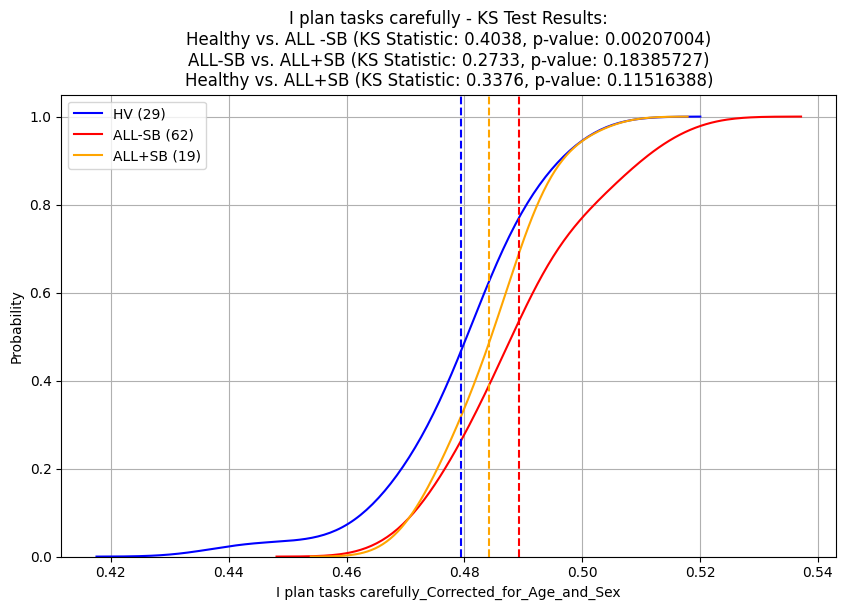

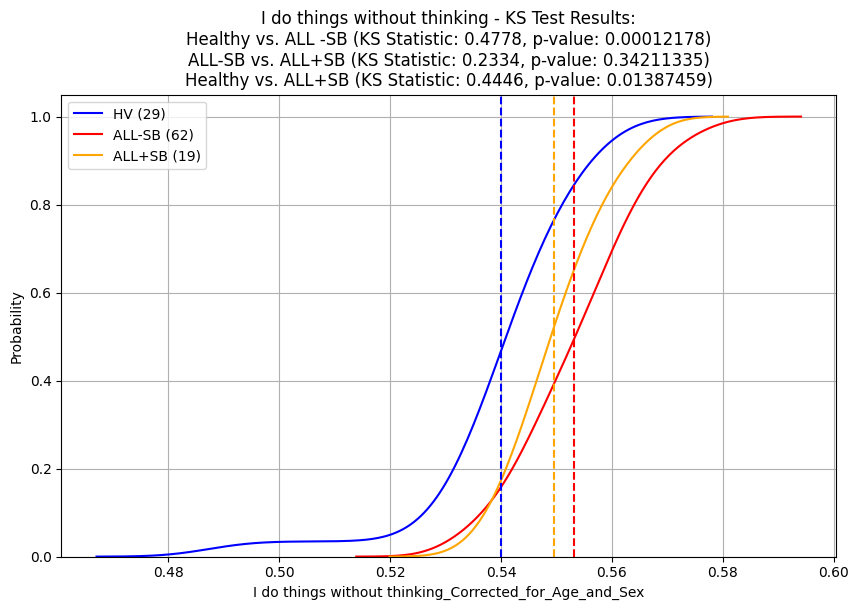

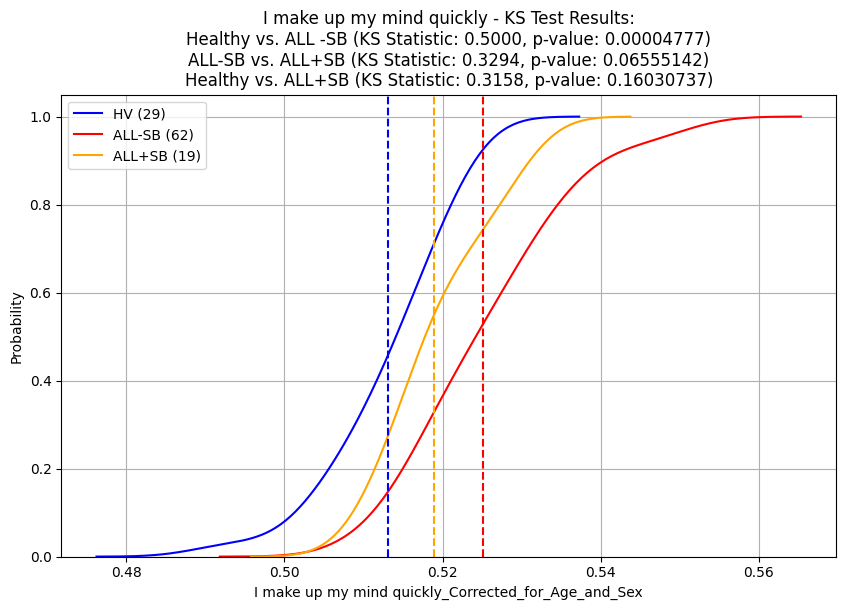

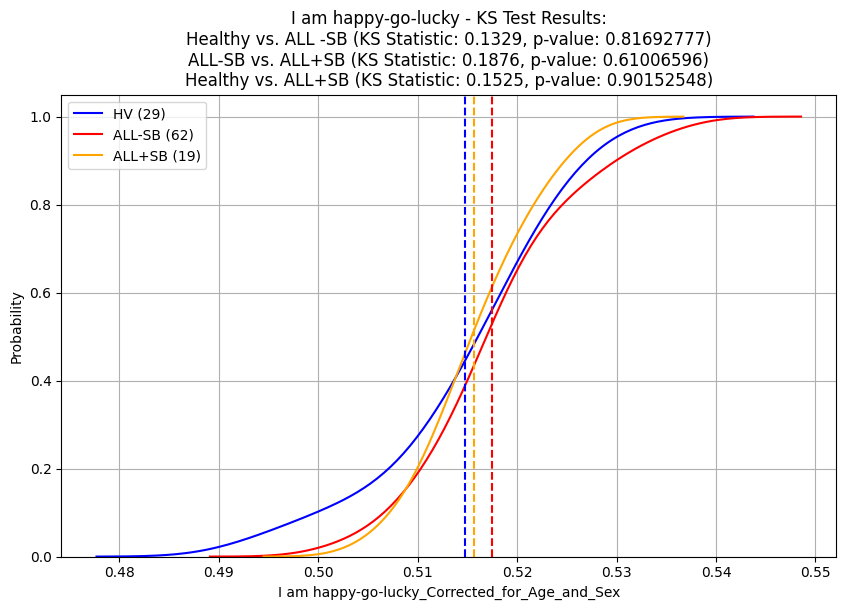

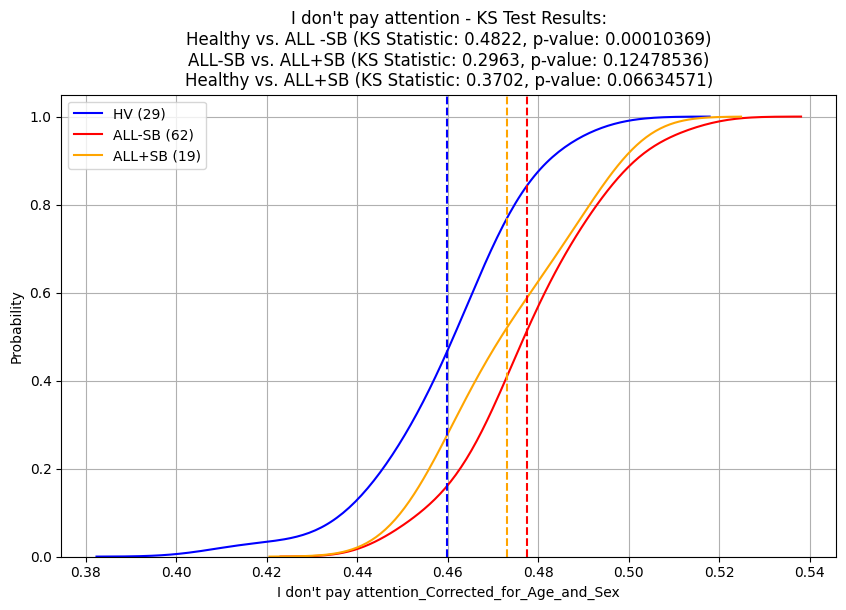

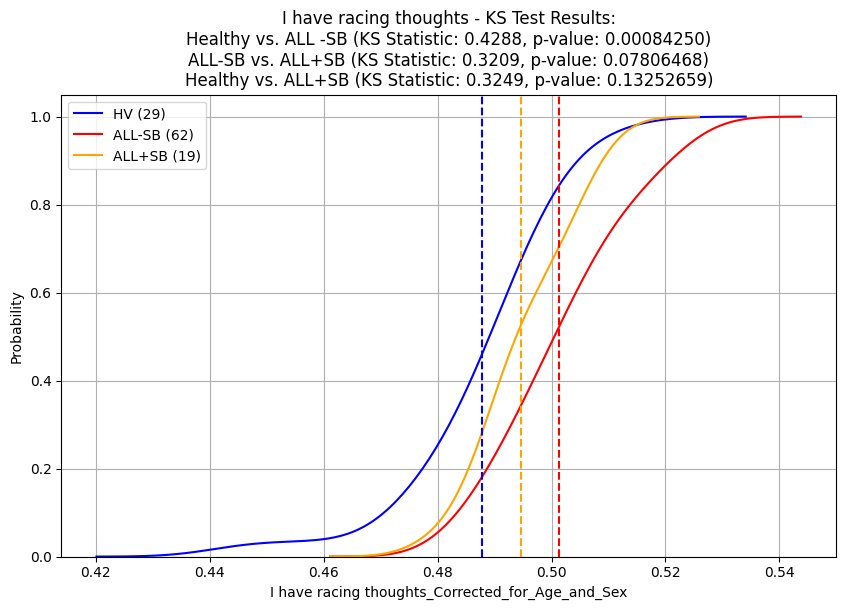

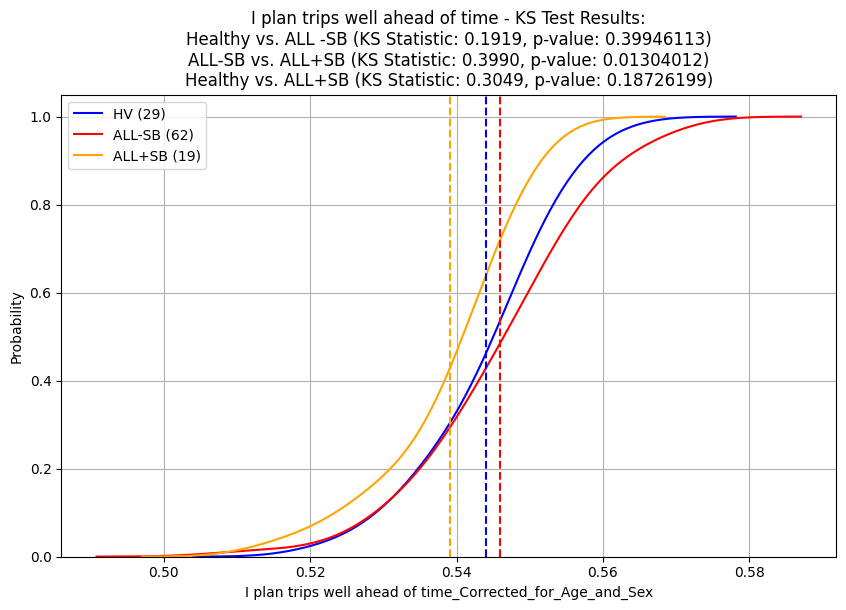

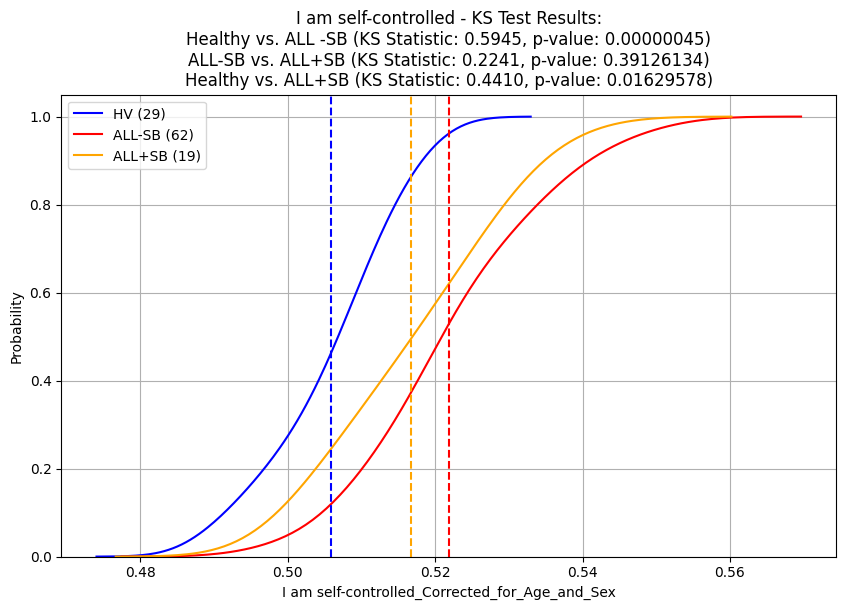

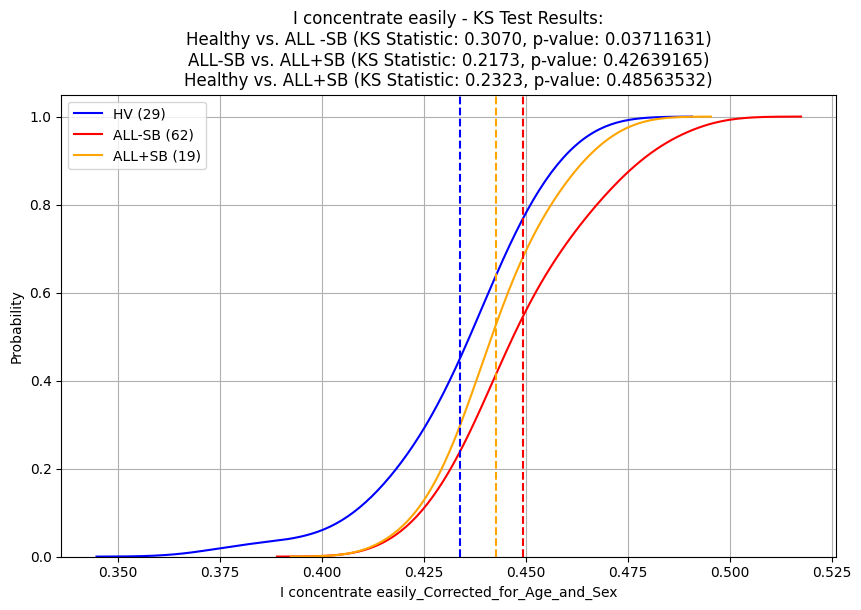

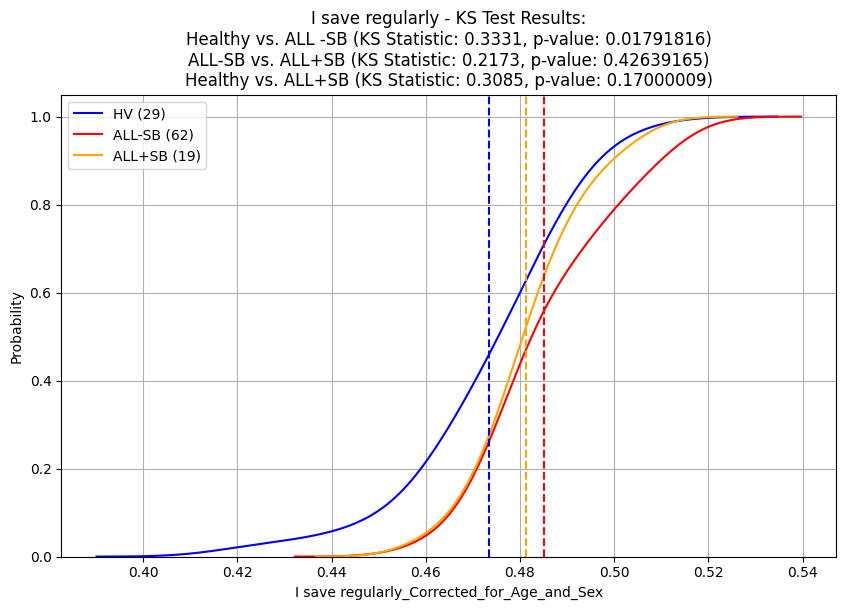

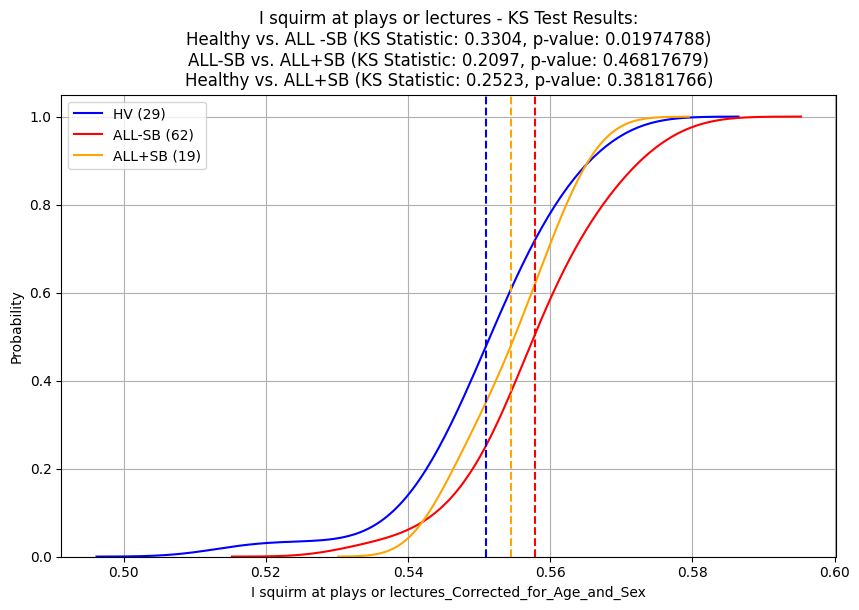

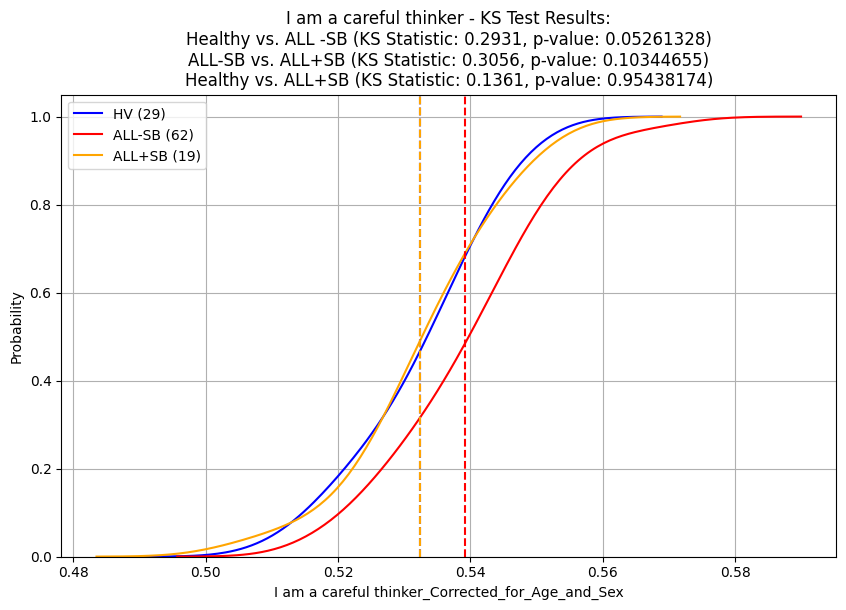

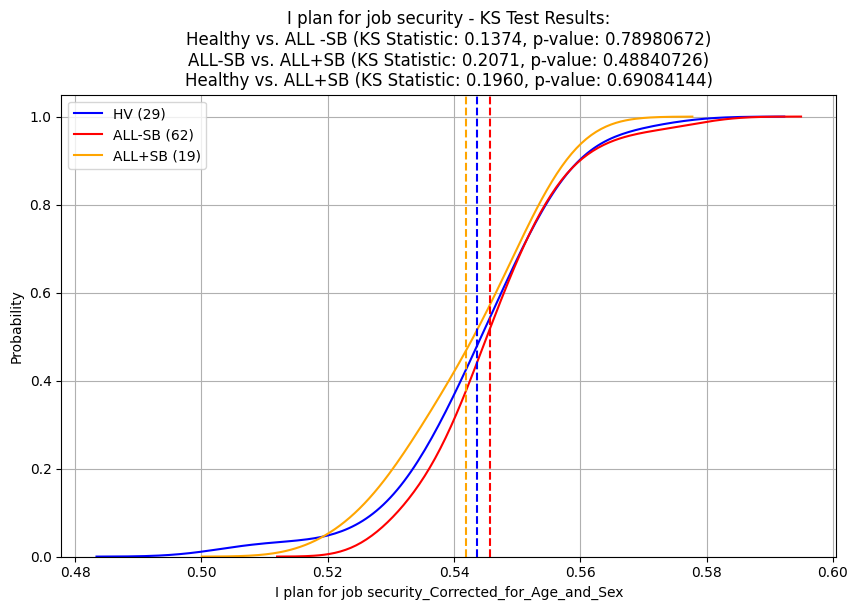

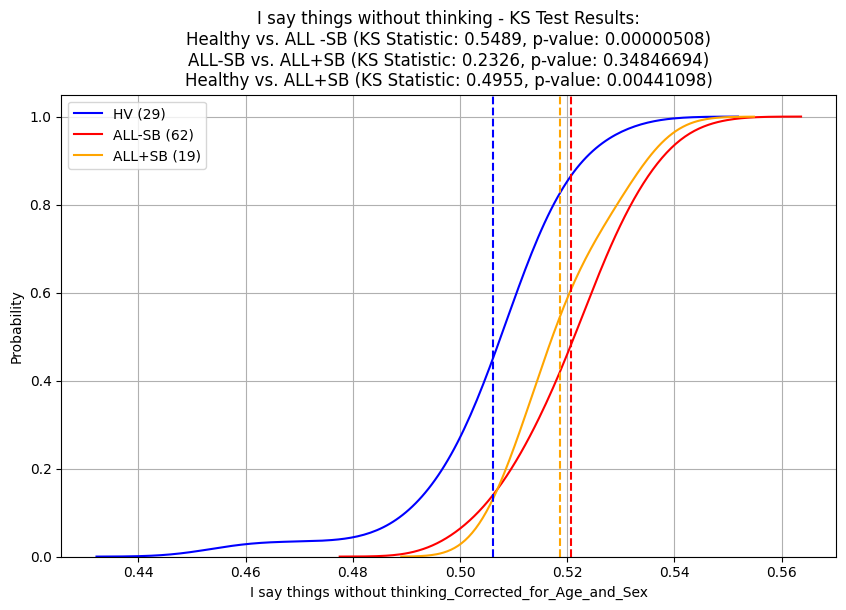

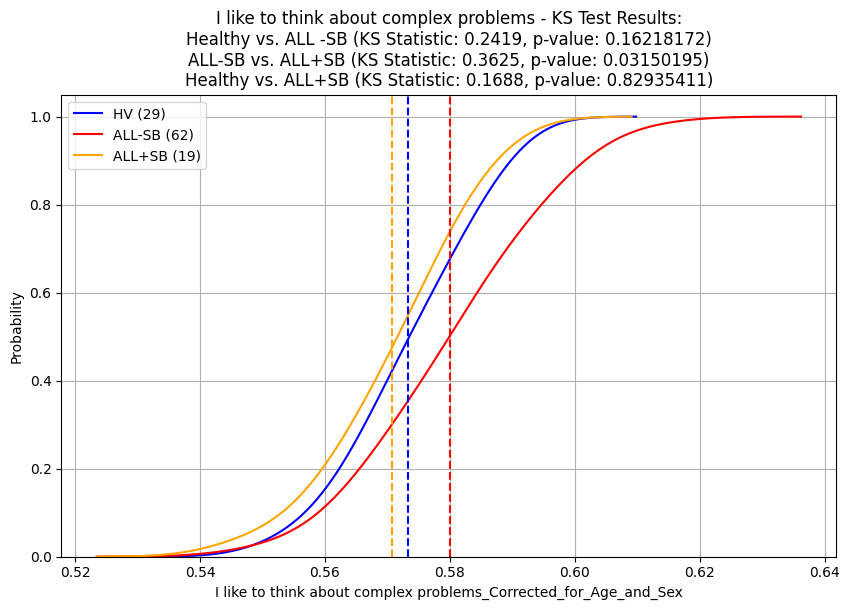

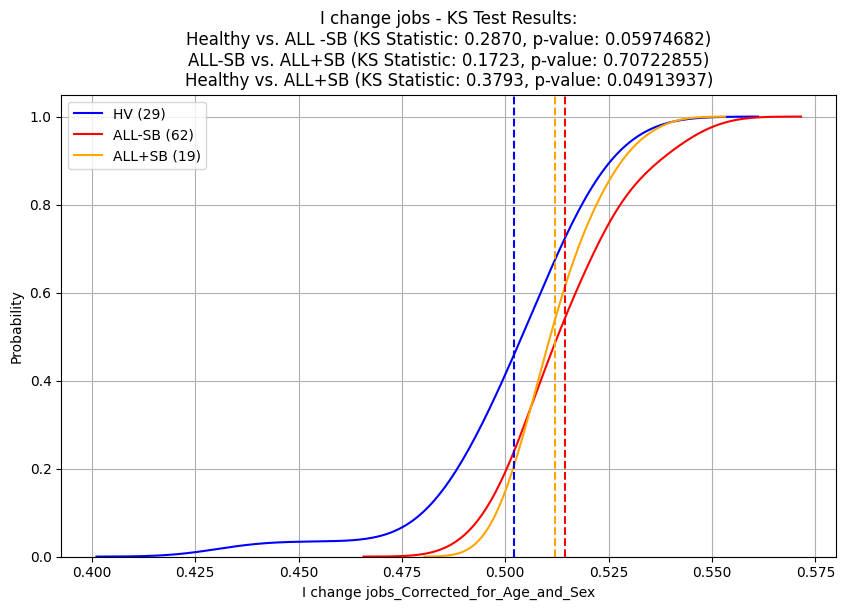

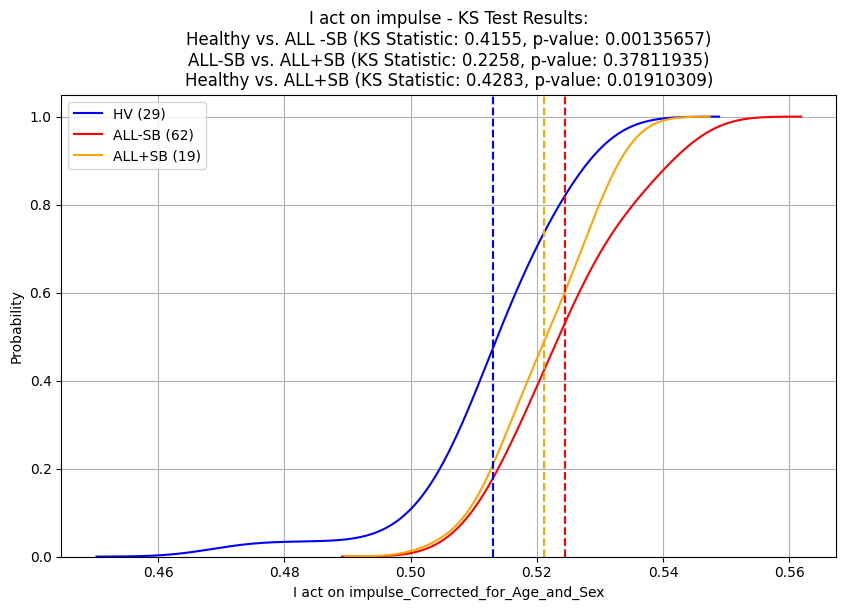

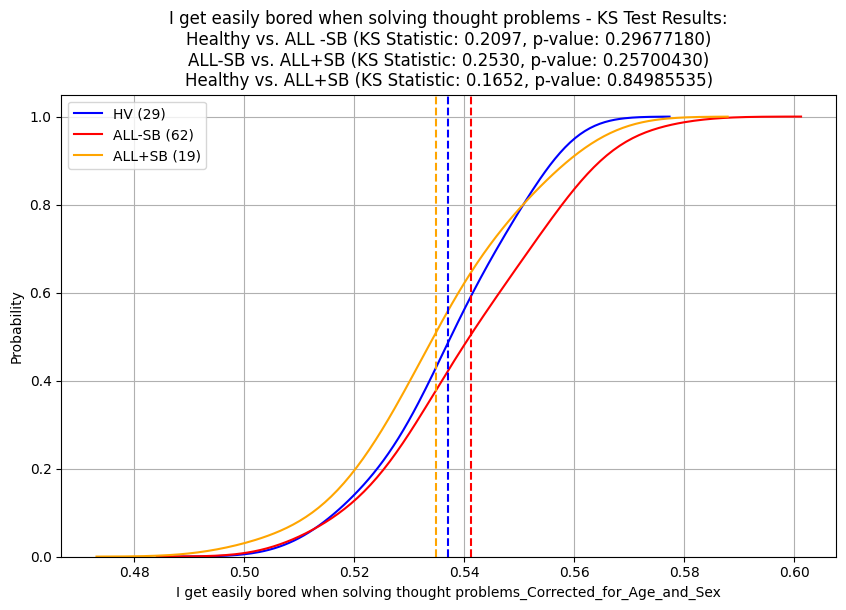

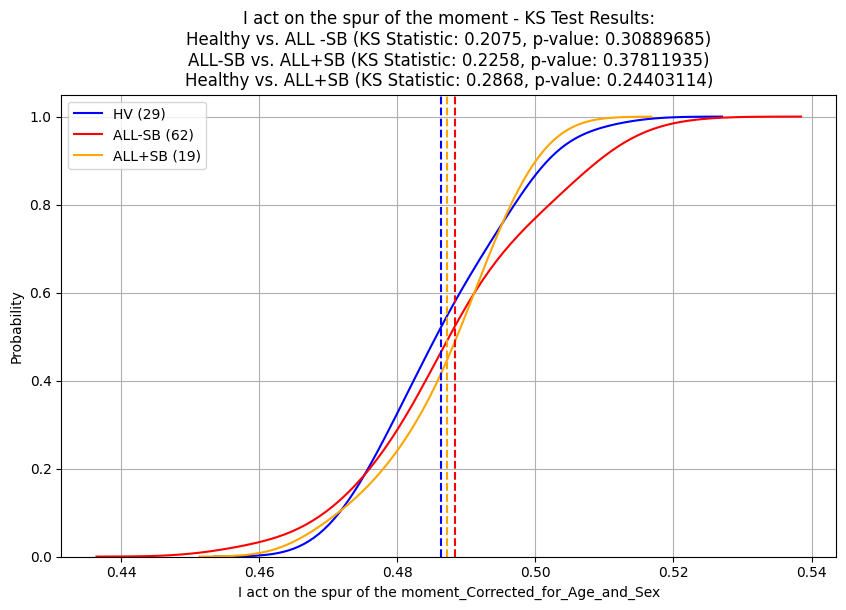

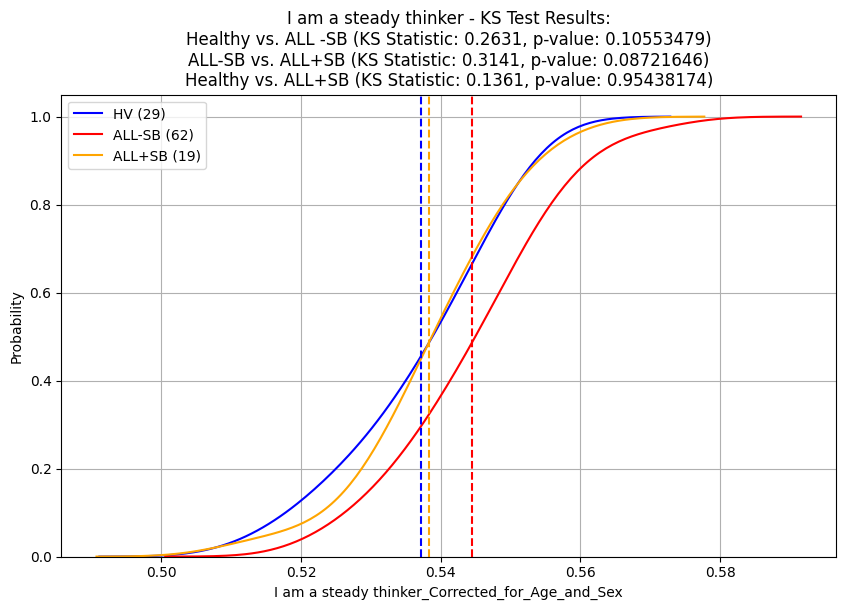

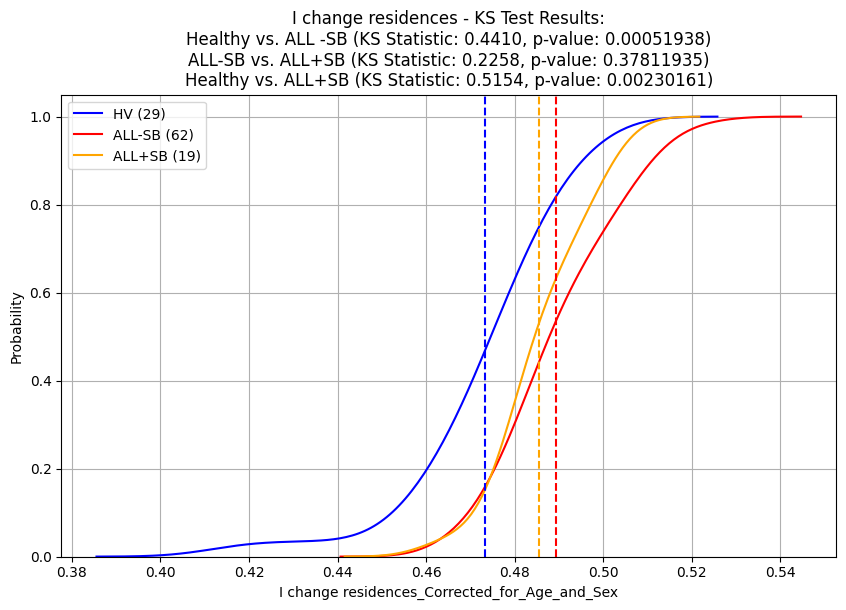

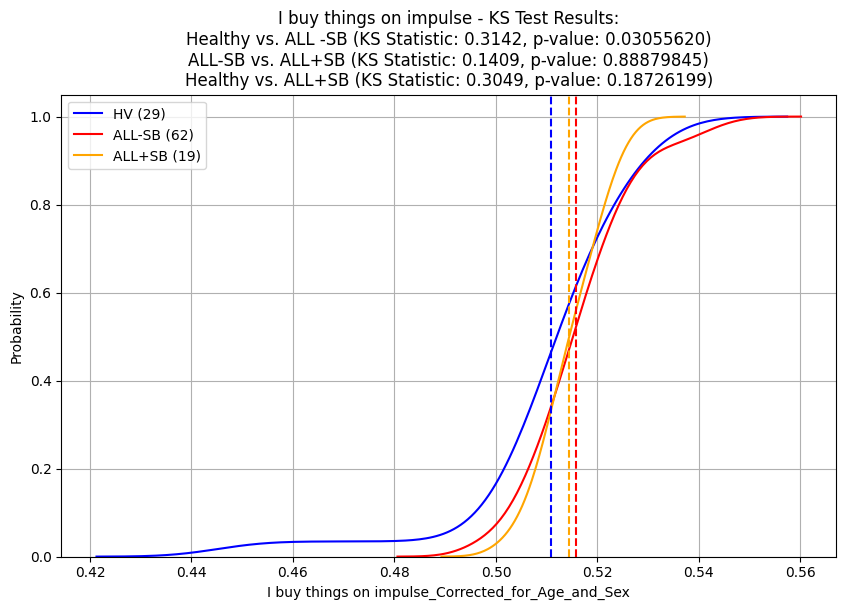

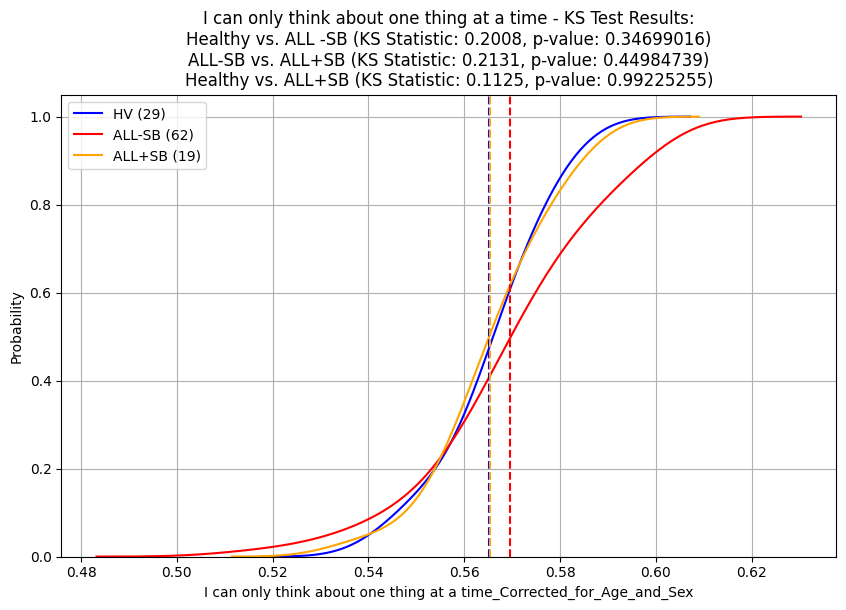

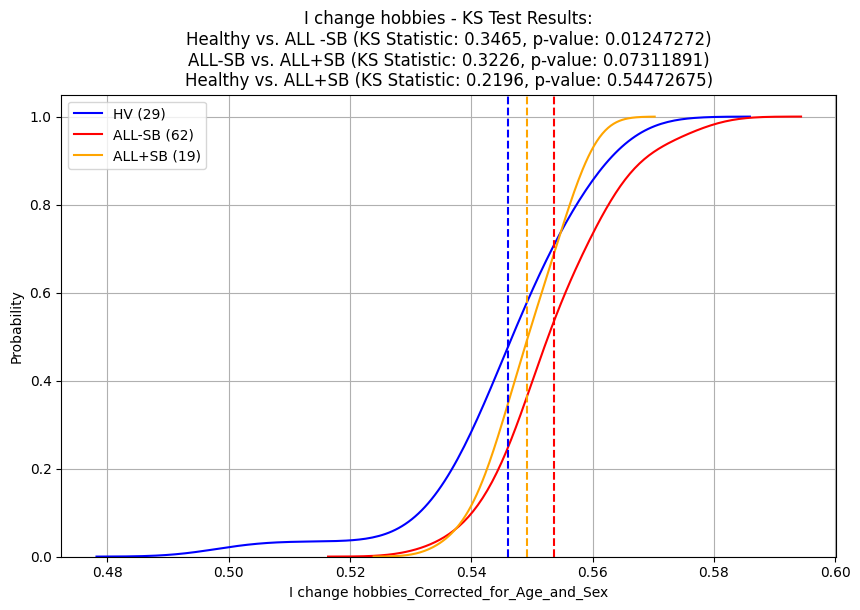

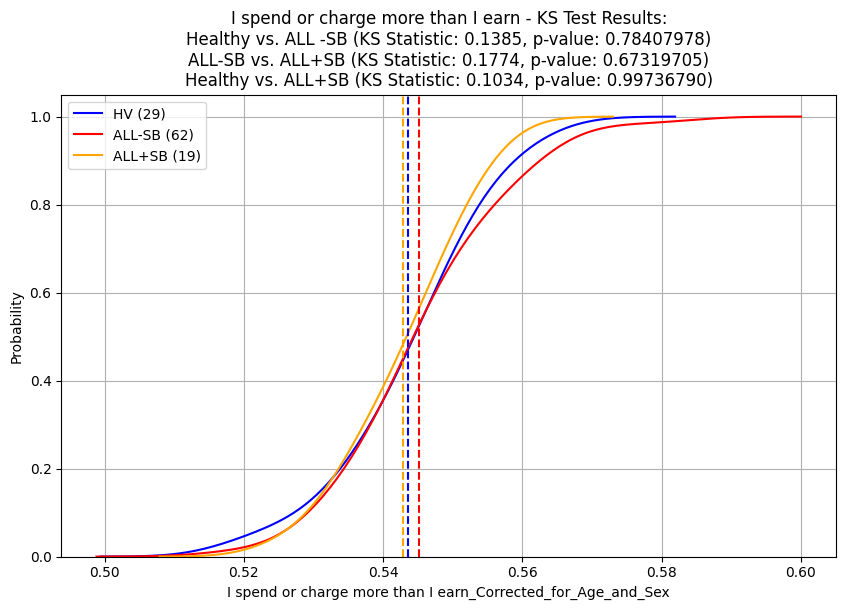

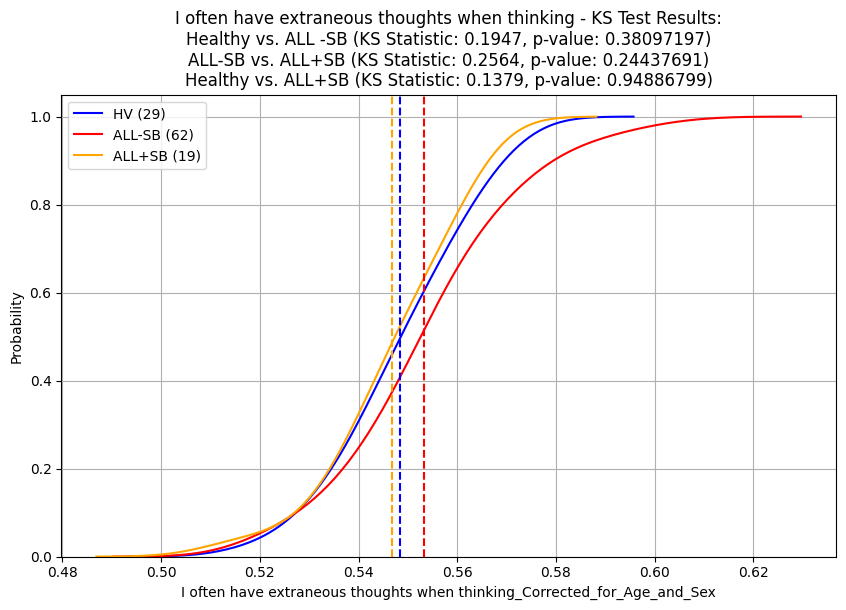

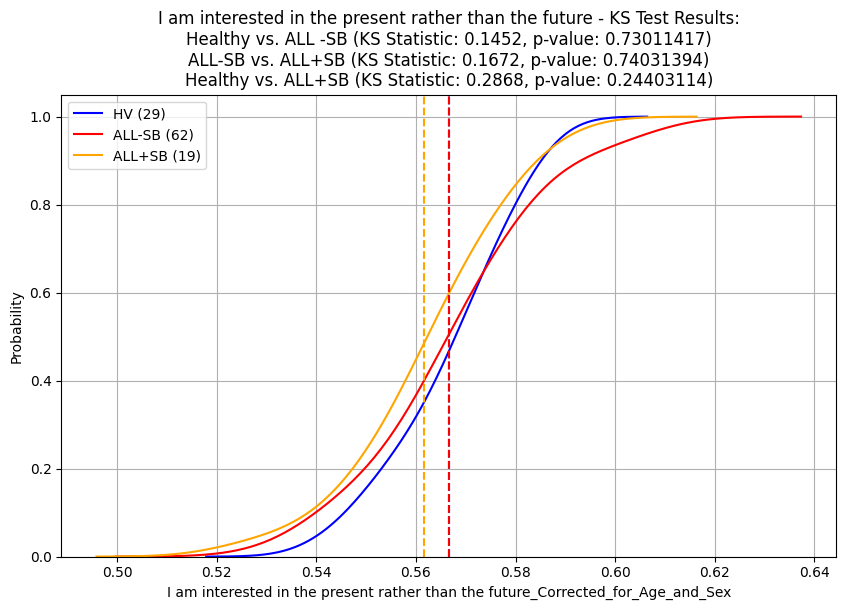

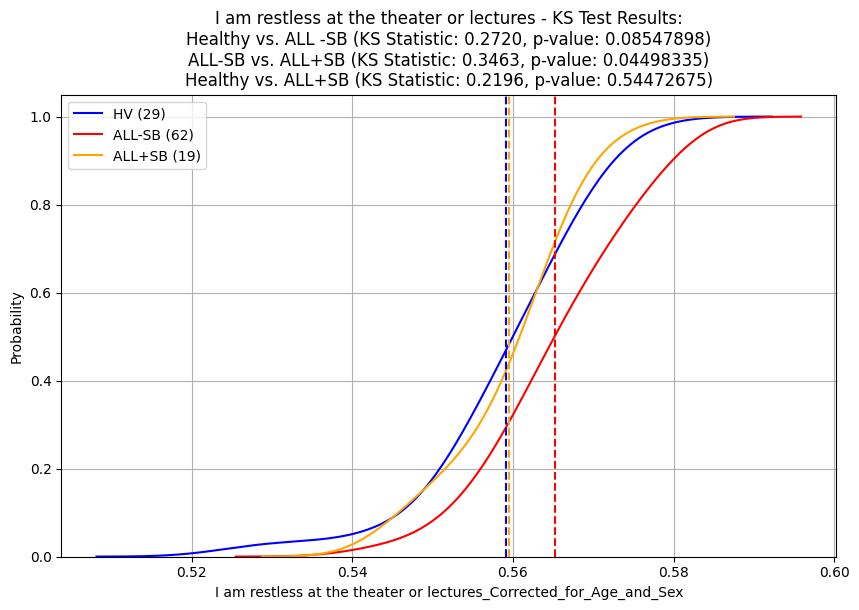

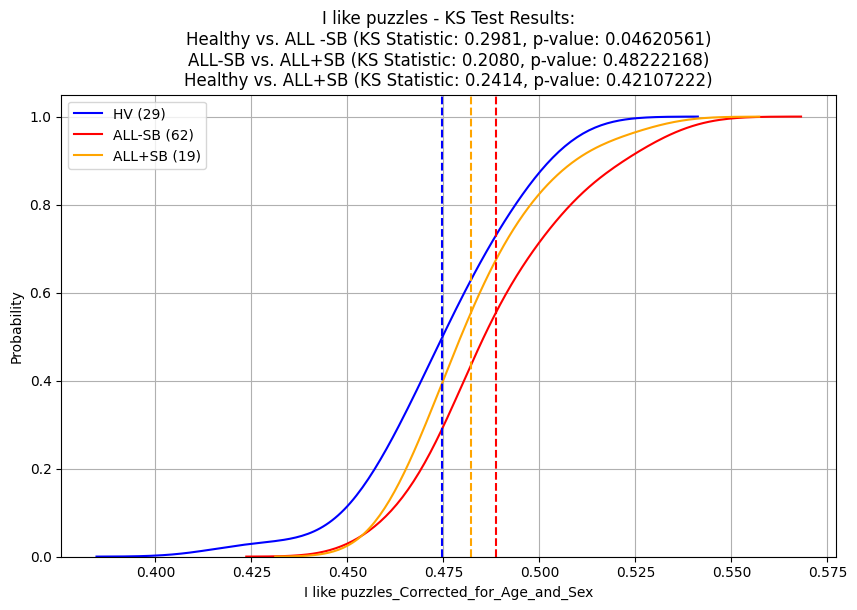

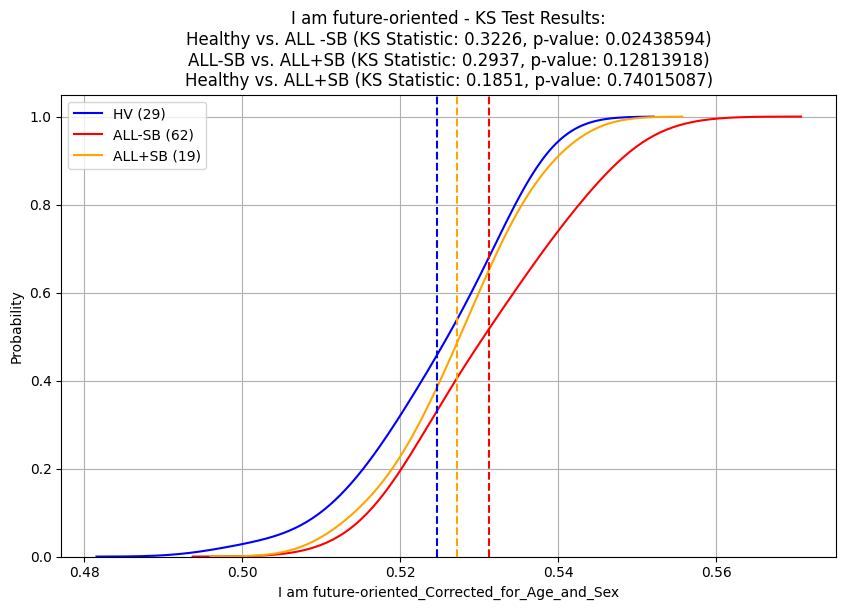

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ks_2samp
from matplotlib.backends.backend_pdf import PdfPages

# Define the columns to iterate
columns_to_iterate = healthy_df.columns[2:32]

with PdfPages('my_plots_age_sex_corrected.pdf') as pdf:
    for col in columns_to_iterate:
        plt.figure(figsize=(10, 6))

        # Create the KDE plots for each group
        ax = sns.kdeplot(healthy_df[col], color='blue', cumulative=True, label=f'HV ({len(healthy_df)})')
        ax = sns.kdeplot(minus_sb_df[col], color='red', cumulative=True, label=f'ALL-SB ({len(minus_sb_df)})')
        ax = sns.kdeplot(plus_sb_df[col], color='orange', cumulative=True, label=f'ALL+SB ({len(plus_sb_df)})')

        # Calculate KS test statistics and p-values
        ks_statistic_hv_minus, p_value_hv_minus = ks_2samp(healthy_df[col], minus_sb_df[col])
        ks_statistic_minus_plus, p_value_minus_plus = ks_2samp(minus_sb_df[col], plus_sb_df[col])
        ks_statistic_hv_plus, p_value_hv_plus = ks_2samp(healthy_df[col], plus_sb_df[col])

        # Add vertical lines for the means
        mean_healthy = np.mean(healthy_df[col])
        mean_minus = np.mean(minus_sb_df[col])
        mean_plus = np.mean(plus_sb_df[col])

        plt.axvline(mean_healthy, color='blue', linestyle='--')
        plt.axvline(mean_minus, color='red', linestyle='--')
        plt.axvline(mean_plus, color='orange', linestyle='--')

        # Add a legend
        plt.legend()

        # Create the title with KS test results
        title = f'{col} - KS Test Results:\n'
        title += f'Healthy vs. ALL -SB (KS Statistic: {ks_statistic_hv_minus:.4f}, p-value: {p_value_hv_minus:.8f})\n'
        title += f'ALL-SB vs. ALL+SB (KS Statistic: {ks_statistic_minus_plus:.4f}, p-value: {p_value_minus_plus:.8f})\n'
        title += f'Healthy vs. ALL+SB (KS Statistic: {ks_statistic_hv_plus:.4f}, p-value: {p_value_hv_plus:.8f})'

        # Set the title and labels
        plt.title(title)
        ax.set_xlabel(col+"_Corrected_for_Age_and_Sex")
        ax.set_ylabel("Probability")

        plt.grid(True)
        pdf.savefig()  # saves the current figure into the pdf

    # Show or save the plots as needed
    plt.show()
